# NLP Project
## dataset IMDB reviews
objective to predict if the reviews are positive or negative

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

In [2]:
imdb,info = tfds.load('imdb_reviews',as_supervised=True,with_info=True)

In [3]:
type(imdb)

dict

In [4]:
imdb.keys()

dict_keys(['train', 'test', 'unsupervised'])

In [5]:
type(imdb['train'])

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [6]:
train = imdb['train']
test = imdb['test']

In [7]:
type(train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [8]:
j=0
for i in train:
    print(i[1])
    j+=1
    if j>2:
        break

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


In [9]:
train_sentence = []
train_label = []
test_sentence = []
test_labels = []

In [10]:
for rev,label in train:
    train_sentence.append(rev.numpy().decode('utf8'))
    train_label.append(label.numpy())

In [11]:
for rev,label in test:
    test_sentence.append(rev.numpy().decode('utf8'))
    test_labels.append(label.numpy())

In [35]:
train_label = np.array(train_label)
test_labels = np.array(test_labels)

In [25]:
# Tokenization
token = Tokenizer(oov_token='#OOV',num_words = 10000)
token.fit_on_texts(train_sentence)

In [26]:
# Squencing
train_seq = token.texts_to_sequences(train_sentence)
test_seq = token.texts_to_sequences(test_sentence)

In [31]:
# padding
train_seq = pad_sequences(train_seq,maxlen=150)
test_seq = pad_sequences(test_seq,maxlen=150)

In [28]:
type(train_seq)

numpy.ndarray

# Training LSTM model

In [23]:
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Embedding

In [24]:
# Feature extractor and Probabitlity mapper

In [29]:
model = tf.keras.Sequential()
vocab_size = 10000
# sequence of tokens we have is of lenth 150 because of padding
# and it will generate a word vector of length 16 for each token
# the word wchich has similar meaning will lie closer
# to the vector
embedding_dim = 16
# Feature extractor
model.add(Embedding(vocab_size,embedding_dim, input_length=150))
# bidirectional means it will retain the information 
# both ways 
model.add(Bidirectional(LSTM(32)))

# Probabitlity mapper
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 173601 (678.13 KB)
Trainable params: 173601 (678.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# for multi calss classification 
# categorical_crossentory - when output label is one hot encoded
# sparse_categorical_crossentropy - when its "not" one hot encoded

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [37]:
2500/32

78.125

In [36]:
# default batch_size is 32, i.e. 32 observation at a time, if not specified
# iteration means with one sample, doing forward and backward processing.
# it divides the length(2500) of data by 32, to get the number of iteration
# it should be a whole number
# in this case 2500/32 i.e. 78.125 iterations,  
# to complete one one epoch it takes 782 iterations
# because of this it will throw warning
# make the number of iteration a whole number
hist = model.fit(train_seq,train_label,
                 validation_data=(test_seq,test_labels),
                 epochs=10)

Epoch 1/10



782/782 [==============================] - 49s 55ms/step - loss: 0.6934 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5004
Epoch 2/10
782/782 [==============================] - 41s 53ms/step - loss: 0.6905 - accuracy: 0.5308 - val_loss: 0.6989 - val_accuracy: 0.4983
Epoch 3/10
782/782 [==============================] - 41s 53ms/step - loss: 0.6298 - accuracy: 0.6399 - val_loss: 0.7830 - val_accuracy: 0.5026
Epoch 4/10
782/782 [==============================] - 41s 52ms/step - loss: 0.4996 - accuracy: 0.7488 - val_loss: 1.0234 - val_accuracy: 0.5028
Epoch 5/10
782/782 [==============================] - 41s 52ms/step - loss: 0.3703 - accuracy: 0.8262 - val_loss: 1.2918 - val_accuracy: 0.4983
Epoch 6/10
782/782 [==============================] - 41s 53ms/step - loss: 0.2645 - accuracy: 0.8824 - val_loss: 1.7786 - val_accuracy: 0.4988
Epoch 7/10
782/782 [==============================] - 42s 53ms/step - loss: 0.1911 - accuracy: 0.9171 - val_loss: 2.3641 - val_accuracy: 0.5025
Epo

In [38]:
hist = model.fit(train_seq,train_label,batch_size=100,
                 validation_data=(test_seq,test_labels),
                 epochs=10)

Epoch 1/10
250/250 [==============================] - 18s 73ms/step - loss: 0.0488 - accuracy: 0.9781 - val_loss: 4.6825 - val_accuracy: 0.4991
Epoch 2/10
250/250 [==============================] - 18s 73ms/step - loss: 0.0347 - accuracy: 0.9845 - val_loss: 4.9214 - val_accuracy: 0.4993
Epoch 3/10
250/250 [==============================] - 18s 73ms/step - loss: 0.0295 - accuracy: 0.9869 - val_loss: 5.0435 - val_accuracy: 0.4989
Epoch 4/10
250/250 [==============================] - 18s 73ms/step - loss: 0.0249 - accuracy: 0.9893 - val_loss: 5.6276 - val_accuracy: 0.4995
Epoch 5/10
250/250 [==============================] - 19s 74ms/step - loss: 0.0240 - accuracy: 0.9897 - val_loss: 5.7162 - val_accuracy: 0.4991
Epoch 6/10
250/250 [==============================] - 20s 80ms/step - loss: 0.0189 - accuracy: 0.9914 - val_loss: 6.3789 - val_accuracy: 0.4997
Epoch 7/10
250/250 [==============================] - 18s 74ms/step - loss: 0.0179 - accuracy: 0.9919 - val_loss: 6.1691 - val_accuracy:

In [39]:
type(hist.history)

dict

In [40]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
hist.history['loss']

[0.04880193993449211,
 0.03471220284700394,
 0.029487820342183113,
 0.024929609149694443,
 0.02398541569709778,
 0.018863538280129433,
 0.01785368286073208,
 0.016048379242420197,
 0.015451900660991669,
 0.01410292275249958]

In [42]:
import matplotlib.pyplot as plt

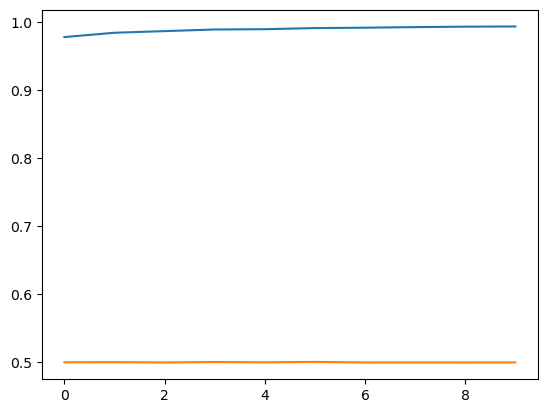

In [43]:
plt.plot(hist.history['accuracy'], label="train_acc")
plt.plot(hist.history['val_accuracy'],label="test_acc")
plt.show()

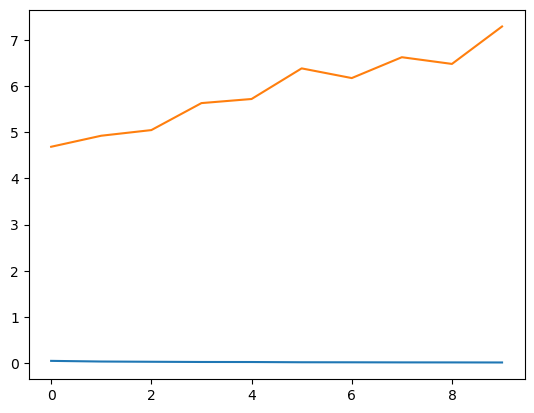

In [45]:
plt.plot(hist.history['loss'], label="train_acc")
plt.plot(hist.history['val_loss'],label="test_acc")
plt.show()

In [44]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
model.predict(test_seq[:5])

1/1 [==============================] - 1s 1s/step


array([[2.3961593e-11],
       [1.5745172e-04],
       [7.8224792e-07],
       [9.9997246e-01],
       [9.9999869e-01]], dtype=float32)

In [47]:
# single dimensional input is not allowed

In [50]:
[1 if i>0.5 else 0 for i in model.predict(test_seq[0:5])]

1/1 [==============================] - 0s 33ms/step


[0, 0, 0, 1, 1]

In [49]:
x

[0, 0, 0, 1, 1]

In [51]:
test_labels[0:5]

array([1, 1, 0, 0, 1], dtype=int64)